<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario:  Predicting whether somebody donated blood in a given month
Blood donations are important in the medical field for a range of reasons, such as assisting patients undergoing surgery, improving the quality of a patient's bloodstream,
managing serious injury/illness or even medical research.

There is a dataset that collects information about how many times a donor donated blood, how much they donated and when they last donated.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.
##### Number of blood donations expected each month? How many donors can be predict next month? How frequent? What type of donor donates the most blood? 

## Potential Questions
List the given or obvious questions.
#### How many donos will donate in a month?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data (transfusion.data)
- Perform some basic structural cleaning to facilitate the work

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
blood = pd.read_csv(r'C:\Users\ryant\Desktop\IOD\DATA\transfusion.data')
blood

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [68]:
#Rename columns for simpler recall
blood.columns = ['Mnths_since_Donated' , 'Total_Donations' , 'Total_blood' , 'Tot_mths' , 'Donated_blood']

In [70]:
blood.info() #Number of featurs and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Mnths_since_Donated  748 non-null    int64
 1   Total_Donations      748 non-null    int64
 2   Total_blood          748 non-null    int64
 3   Tot_mths             748 non-null    int64
 4   Donated_blood        748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [72]:
blood.describe().T 

,count,mean,std,min,25%,50%,75%,max
Mnths_since_Donated,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Total_Donations,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Total_blood,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Tot_mths,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
Donated_blood,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [74]:
blood.isnull().sum() #no null values

Mnths_since_Donated    0
Total_Donations        0
Total_blood            0
Tot_mths               0
Donated_blood          0
dtype: int64

In [76]:
(blood == '').sum() #no missing values

Mnths_since_Donated    0
Total_Donations        0
Total_blood            0
Tot_mths               0
Donated_blood          0
dtype: int64

In [78]:
#unique values for each column.  No coded content or strings.
for u in blood.columns:
    print('Unique values in', u)
    print(blood[u].unique())
    print('-' * 40)

Unique values in Mnths_since_Donated
[ 2  0  1  4  5  9  3 12  6 11 10 13  8 14  7 16 15 23 21 18 22 26 35 38
 40 74 20 17 25 39 72]
----------------------------------------
Unique values in Total_Donations
[50 13 16 20 24  4  7 12  9 46 23  3 10  6  5 14 15 11  8  2 19 17  1 22
 18 38 43 34 44 26 41 21 33]
----------------------------------------
Unique values in Total_blood
[12500  3250  4000  5000  6000  1000  1750  3000  2250 11500  5750   750
  2500  1500  1250  3500  3750  2750  2000   500  4750  4250   250  5500
  4500  9500 10750  8500 11000  6500 10250  5250  8250]
----------------------------------------
Unique values in Tot_mths
[98 28 35 45 77  4 14 22 58 47 15 11 48 49 16 40 34 21 26 64 57 53 69 36
  2 46 52 81 29  9 74 25 51 71 23 86 38 76 70 59 82 61 79 41 33 10 95 88
 19 37 39 78 42 27 24 63 43 75 73 50 60 17 72 62 30 31 65 89 87 93 83 32
 12 18 55  3 13 54]
----------------------------------------
Unique values in Donated_blood
[1 0]
-----------------------------------

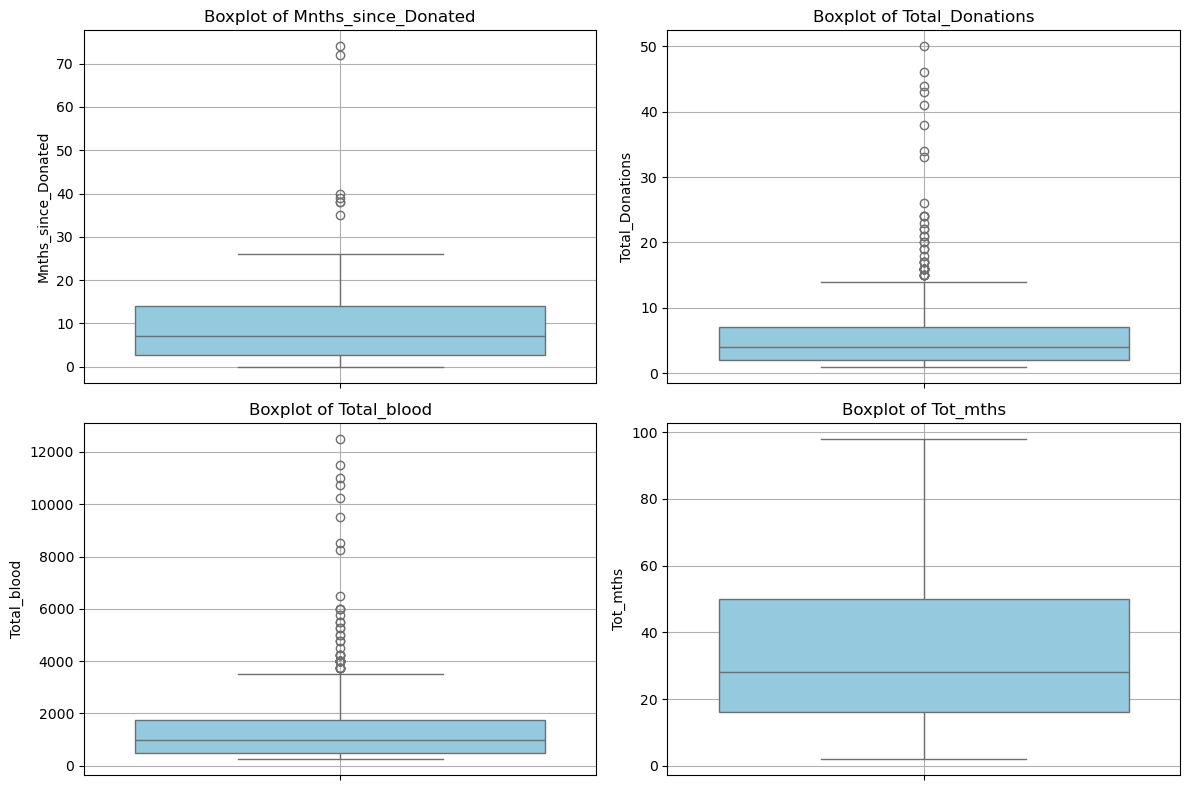

In [80]:
#Boxplot data to visualise outliers
plt.figure(figsize=(12, 8))

columns = ['Mnths_since_Donated' , 'Total_Donations' , 'Total_blood' , 'Tot_mths']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=blood[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

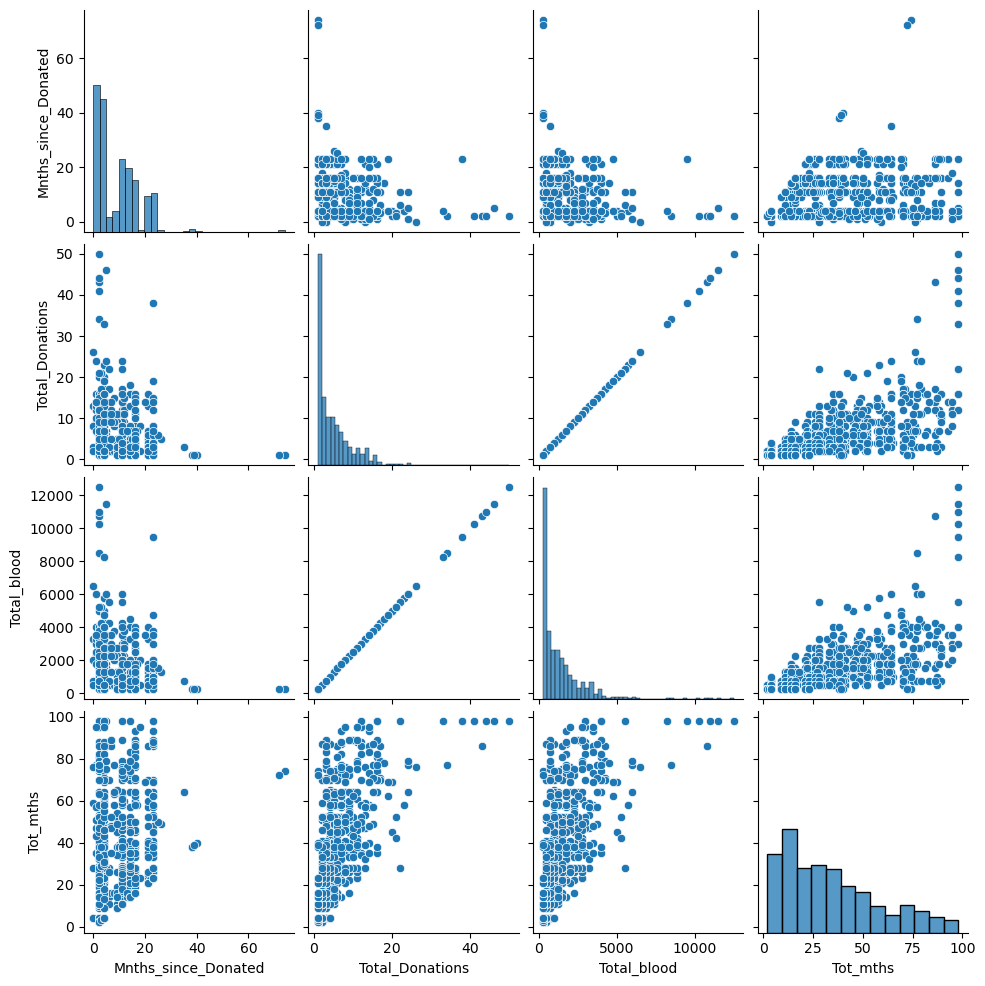

In [82]:
sns.pairplot(data = blood[blood.columns[:-1]]) #excluding donated blood column
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [87]:
blood.columns

Index(['Mnths_since_Donated', 'Total_Donations', 'Total_blood', 'Tot_mths',
       'Donated_blood'],
      dtype='object')

In [95]:
features = ['Mnths_since_Donated', 'Total_Donations', 'Total_blood', 'Tot_mths'] #Input variables
label = 'Donated_blood' #output variable with data type object. 

#Supervised and classification(binary) type modelling.

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [107]:
from sklearn.model_selection import train_test_split

In [157]:
X.shape[0] - 500

248

In [148]:
blood['Donated_blood'].value_counts(normalize = True) * 100 #Proportion of target data

Donated_blood
0    76.203209
1    23.796791
Name: proportion, dtype: float64

In [150]:
#define X and y
X = blood[features]
y = blood[label]

In [163]:
#Split the data and cater for unbalaced classes
X_train, X_test, y_train, y_test = train_test_split( X , y,
                                                    test_size = 0.2 , 
                                                    random_state = 87,
                                                    stratify = y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [206]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Step 9: Fit the Model

In [208]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [170]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [210]:
y_train_pred = model.predict(X_train)

In [212]:
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Detailed report
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))

# Confusion matrix
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, y_train_pred))

Training Accuracy: 0.9448160535117057

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       456
           1       0.99      0.77      0.87       142

    accuracy                           0.94       598
   macro avg       0.96      0.89      0.92       598
weighted avg       0.95      0.94      0.94       598

Confusion Matrix (Train):
 [[455   1]
 [ 32 110]]


In [183]:
#Hyperparameter tuning using gridsearch
from sklearn.model_selection import GridSearchCV

In [192]:
model.get_params() #the parameters for decisiontree

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [194]:
model.get_depth() #lets adjust max depth based on gridsearch

18

In [204]:
hyperparam = {
    'max_depth': [3, 5, 10, 18, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=87), hyperparam, cv=5)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)

Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [224]:
model2 = DecisionTreeClassifier(max_depth = 3)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [226]:
y_train_pred = model2.predict(X_train)

In [228]:
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Detailed report
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))

# Confusion matrix
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, y_train_pred))

Training Accuracy: 0.8043478260869565

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       456
           1       0.62      0.45      0.52       142

    accuracy                           0.80       598
   macro avg       0.73      0.68      0.70       598
weighted avg       0.79      0.80      0.79       598

Confusion Matrix (Train):
 [[417  39]
 [ 78  64]]


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [232]:
y_test_pred = model2.predict(X_test)

In [234]:
# Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.7666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       114
           1       0.53      0.25      0.34        36

    accuracy                           0.77       150
   macro avg       0.66      0.59      0.60       150
weighted avg       0.73      0.77      0.73       150

Confusion Matrix:
[[106   8]
 [ 27   9]]


# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [238]:
predictions = model2.predict(X_test)

In [240]:
donor_count = np.sum(predictions)
print(f"Predicted number of donors this month: {donor_count}")

Predicted number of donors this month: 17


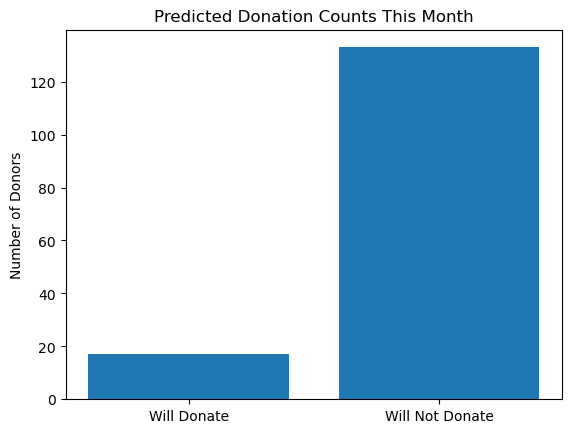

In [242]:
plt.bar(['Will Donate', 'Will Not Donate'], [np.sum(predictions==1), np.sum(predictions==0)])
plt.title('Predicted Donation Counts This Month')
plt.ylabel('Number of Donors')
plt.show()

In [252]:
from sklearn import tree

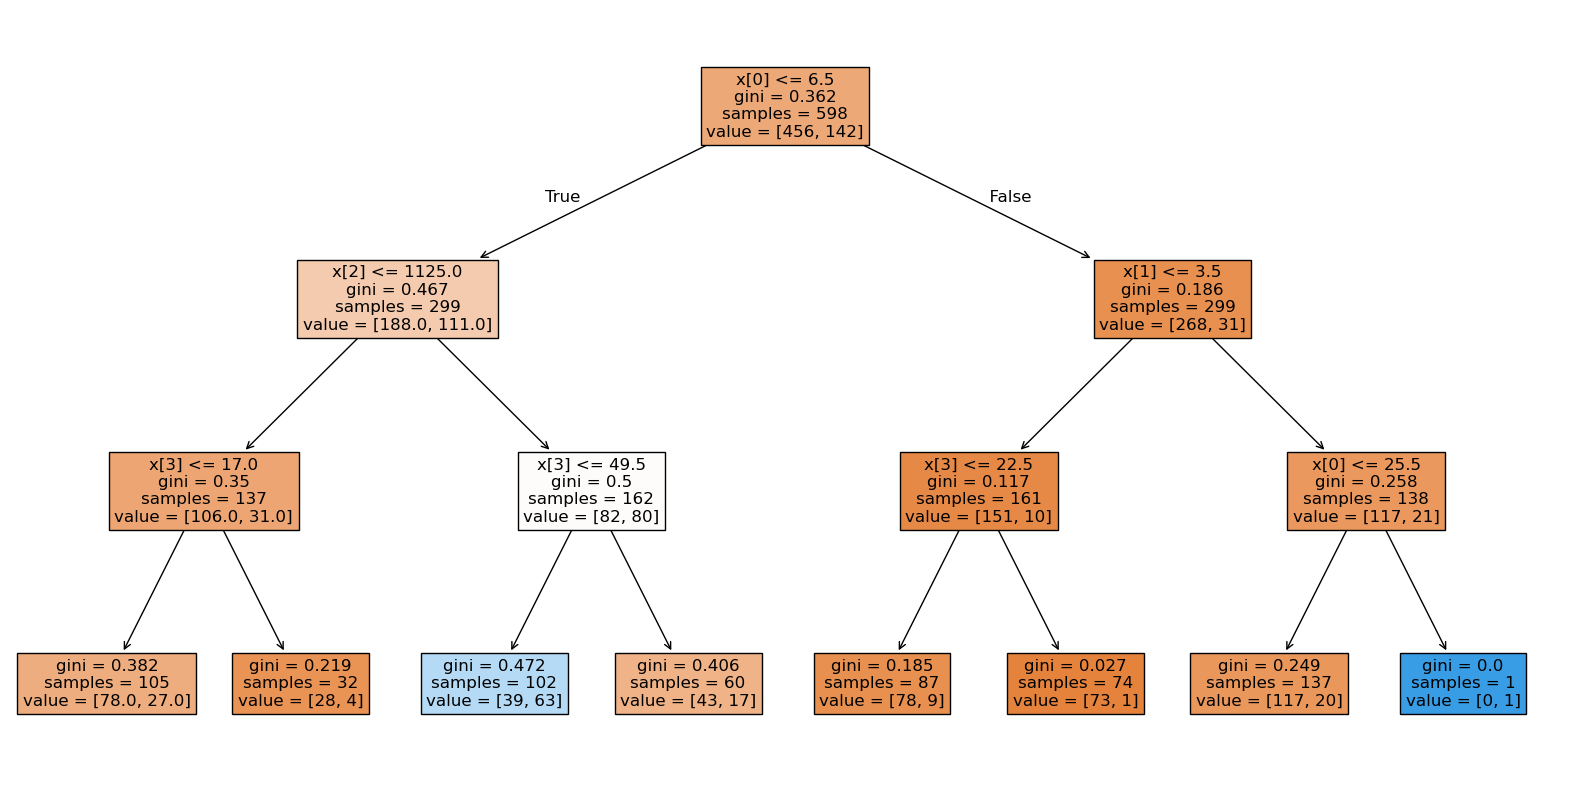

In [254]:
plt.figure(figsize=(20,10))
tree.plot_tree(model2, max_depth=3, fontsize=12, filled=True)
plt.show()



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



